In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plot
import scipy
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import seaborn as sns

In [2]:
file = "C:/Users/ppbin/OneDrive/Desktop/Ak Data Analytics23/Datascience/Project/spotify-youtube.csv"
data= pd.read_csv(file)


In [3]:
data

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20713,20713,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,JUST DANCE HARDSTYLE,JUST DANCE HARDSTYLE,single,spotify:track:0RtcKQGyI4hr8FgFH1TuYG,0.582,0.926,5.0,...,https://www.youtube.com/watch?v=5SHmKFKlNqI,JUST DANCE HARDSTYLE,SICK LEGEND - Topic,71678.0,1113.0,0.0,Provided to YouTube by Routenote\n\nJUST DANCE...,True,True,9.227144e+06
20714,20714,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,SET FIRE TO THE RAIN HARDSTYLE,SET FIRE TO THE RAIN HARDSTYLE,single,spotify:track:3rHvPA8lUnPBkaLyPOc0VV,0.531,0.936,4.0,...,https://www.youtube.com/watch?v=ocTH6KxllDQ,SET FIRE TO THE RAIN HARDSTYLE,SICK LEGEND - Topic,164741.0,2019.0,0.0,Provided to YouTube by Routenote\n\nSET FIRE T...,True,True,1.089818e+07
20715,20715,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,OUTSIDE HARDSTYLE SPED UP,OUTSIDE HARDSTYLE SPED UP,single,spotify:track:4jk00YxPtPbhvHJE9N4ddv,0.443,0.830,4.0,...,https://www.youtube.com/watch?v=5wFhE-HY0hg,OUTSIDE HARDSTYLE SPED UP,SICK LEGEND - Topic,35646.0,329.0,0.0,Provided to YouTube by Routenote\n\nOUTSIDE HA...,True,True,6.226110e+06
20716,20716,SICK LEGEND,https://open.spotify.com/artist/3EYY5FwDkHEYLw...,ONLY GIRL HARDSTYLE,ONLY GIRL HARDSTYLE,single,spotify:track:5EyErbpsugWliX006eTDex,0.417,0.767,9.0,...,https://www.youtube.com/watch?v=VMFLbFRNCn0,ONLY GIRL HARDSTYLE,SICK LEGEND - Topic,6533.0,88.0,0.0,Provided to YouTube by Routenote\n\nONLY GIRL ...,True,True,6.873961e+06


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

In [5]:
data.head(5)

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


In [6]:
data.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [7]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,20718.0,1.035850e+04,5.980916e+03,0.000000,5.179250e+03,1.035850e+04,1.553775e+04,2.071700e+04
Danceability,20716.0,6.197775e-01,1.652724e-01,0.000000,5.180000e-01,6.370000e-01,7.402500e-01,9.750000e-01
Energy,20716.0,6.352503e-01,2.141468e-01,0.000020,5.070000e-01,6.660000e-01,7.980000e-01,1.000000e+00
Key,20716.0,5.300348e+00,3.576449e+00,0.000000,2.000000e+00,5.000000e+00,8.000000e+00,1.100000e+01
Loudness,20716.0,-7.671680e+00,4.632749e+00,-46.251000,-8.858000e+00,-6.536000e+00,-4.931000e+00,9.200000e-01
Speechiness,20716.0,9.645601e-02,1.119600e-01,0.000000,3.570000e-02,5.050000e-02,1.030000e-01,9.640000e-01
Acousticness,20716.0,2.915353e-01,2.862988e-01,0.000001,4.520000e-02,1.930000e-01,4.772500e-01,9.960000e-01
Instrumentalness,20716.0,5.596156e-02,1.932620e-01,0.000000,0.000000e+00,2.405000e-06,4.630000e-04,1.000000e+00
Liveness,20716.0,1.935210e-01,1.685309e-01,0.014500,9.410000e-02,1.250000e-01,2.370000e-01,1.000000e+00
Valence,20716.0,5.298533e-01,2.454408e-01,0.000000,3.390000e-01,5.370000e-01,7.262500e-01,9.930000e-01


In [8]:
data.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [9]:
data.nunique()

Unnamed: 0          20718
Artist               2079
Url_spotify          2079
Track               17841
Album               11932
Album_type              3
Uri                 18862
Danceability          898
Energy               1268
Key                    12
Loudness             9417
Speechiness          1303
Acousticness         3138
Instrumentalness     4012
Liveness             1536
Valence              1293
Tempo               15024
Duration_ms         14690
Url_youtube         18154
Title               18146
Channel              6714
Views               19245
Likes               17939
Comments            10485
Description         17395
Licensed                2
official_video          2
Stream              18461
dtype: int64

In [10]:
data.dtypes

Unnamed: 0            int64
Artist               object
Url_spotify          object
Track                object
Album                object
Album_type           object
Uri                  object
Danceability        float64
Energy              float64
Key                 float64
Loudness            float64
Speechiness         float64
Acousticness        float64
Instrumentalness    float64
Liveness            float64
Valence             float64
Tempo               float64
Duration_ms         float64
Url_youtube          object
Title                object
Channel              object
Views               float64
Likes               float64
Comments            float64
Description          object
Licensed             object
official_video       object
Stream              float64
dtype: object

In [11]:
# checking the dataset for missing values
print(data.isnull().sum())

Unnamed: 0            0
Artist                0
Url_spotify           0
Track                 0
Album                 0
Album_type            0
Uri                   0
Danceability          2
Energy                2
Key                   2
Loudness              2
Speechiness           2
Acousticness          2
Instrumentalness      2
Liveness              2
Valence               2
Tempo                 2
Duration_ms           2
Url_youtube         470
Title               470
Channel             470
Views               470
Likes               541
Comments            569
Description         876
Licensed            470
official_video      470
Stream              576
dtype: int64


In [12]:
# To drop all missing values
#data.dropna(axis=0, inplace=True)

In [13]:
data.describe()

,Unnamed: 0,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
count,20718.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,20716.000000,2.071600e+04,2.024800e+04,2.017700e+04,2.014900e+04,2.014200e+04
mean,10358.500000,0.619777,0.635250,5.300348,-7.671680,0.096456,0.291535,0.055962,0.193521,0.529853,120.638340,2.247176e+05,9.393782e+07,6.633411e+05,2.751899e+04,1.359422e+08
std,5980.915774,0.165272,0.214147,3.576449,4.632749,0.111960,0.286299,0.193262,0.168531,0.245441,29.579018,1.247905e+05,2.746443e+08,1.789324e+06,1.932347e+05,2.441321e+08
min,0.000000,0.000000,0.000020,0.000000,-46.251000,0.000000,0.000001,0.000000,0.014500,0.000000,0.000000,3.098500e+04,0.000000e+00,0.000000e+00,0.000000e+00,6.574000e+03
25%,5179.250000,0.518000,0.507000,2.000000,-8.858000,0.035700,0.045200,0.000000,0.094100,0.339000,97.002000,1.800095e+05,1.826002e+06,2.158100e+04,5.090000e+02,1.767486e+07
50%,10358.500000,0.637000,0.666000,5.000000,-6.536000,0.050500,0.193000,0.000002,0.125000,0.537000,119.965000,2.132845e+05,1.450110e+07,1.244810e+05,3.277000e+03,4.968298e+07
75%,15537.750000,0.740250,0.798000,8.000000,-4.931000,0.103000,0.477250,0.000463,0.237000,0.726250,139.935000,2.524430e+05,7.039975e+07,5.221480e+05,1.436000e+04,1.383581e+08
max,20717.000000,0.975000,1.000000,11.000000,0.920000,0.964000,0.996000,1.000000,1.000000,0.993000,243.372000,4.676058e+06,8.079649e+09,5.078865e+07,1.608314e+07,3.386520e+09


In [14]:
# replacing missing values using median
for i in ['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms','Views', 'Likes','Comments', 'Stream']:
    data[i]= data[i].fillna(data[i].median())

In [15]:
for i in ['Url_youtube', 'Title', 'Channel','Description', 'Licensed', 'official_video']:
    data[i]= data[i].fillna(data[i].mode()[0])

In [16]:
print(data.isnull().sum())

Unnamed: 0          0
Artist              0
Url_spotify         0
Track               0
Album               0
Album_type          0
Uri                 0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Url_youtube         0
Title               0
Channel             0
Views               0
Likes               0
Comments            0
Description         0
Licensed            0
official_video      0
Stream              0
dtype: int64


In [17]:
data.duplicated().sum()

0

In [18]:
data["Artist"].value_counts()

Gorillaz                  10
Die drei !!!              10
Hollywood Undead          10
Empire of the Sun         10
White Noise for Babies    10
                          ..
NewJeans                   6
Alfonso Herrera            6
Jimin                      3
Stars Music Chile          1
Bootie Brown               1
Name: Artist, Length: 2079, dtype: int64

In [19]:
data["Artist"]

0           Gorillaz
1           Gorillaz
2           Gorillaz
3           Gorillaz
4           Gorillaz
            ...     
20713    SICK LEGEND
20714    SICK LEGEND
20715    SICK LEGEND
20716    SICK LEGEND
20717    SICK LEGEND
Name: Artist, Length: 20718, dtype: object

# Exploratory Data Analysis (EDA)

<Axes: xlabel='Danceability'>

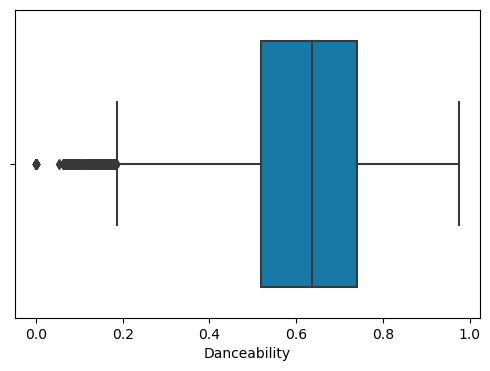

In [20]:
plot.figure(figsize=(6, 4))
sns.boxplot(data, x='Danceability',palette='winter')

<Axes: xlabel='Danceability'>

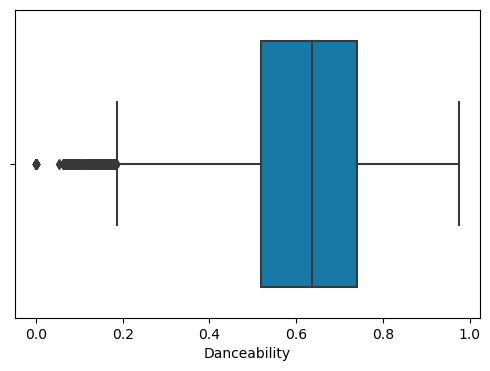

In [21]:
plot.figure(figsize=(6, 4))
sns.boxplot(data, x='Danceability',palette='winter')

<Axes: xlabel='Acousticness'>

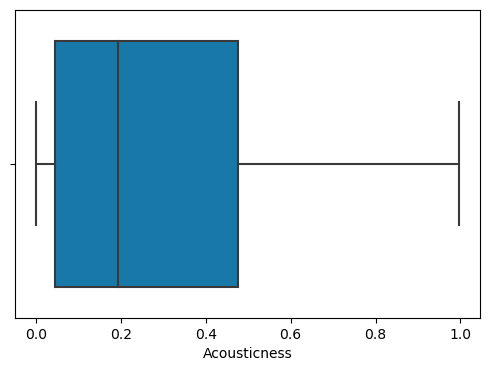

In [22]:
plot.figure(figsize=(6, 4))
sns.boxplot(data, x='Acousticness',palette='winter')

<Axes: xlabel='Energy'>

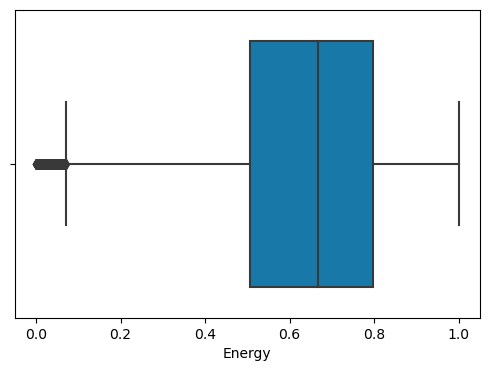

In [23]:
plot.figure(figsize=(6, 4))
sns.boxplot(data, x='Energy',palette='winter')

<Axes: xlabel='Key'>

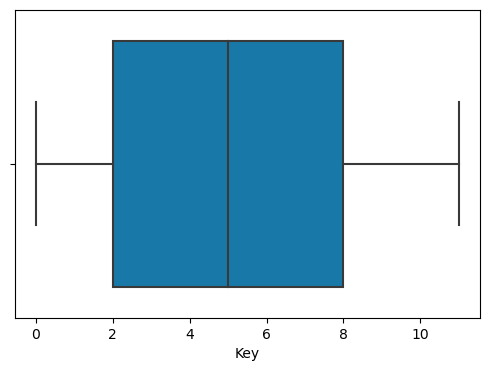

In [24]:
plot.figure(figsize=(6, 4))
sns.boxplot(data, x='Key',palette='winter')

<Axes: xlabel='Loudness'>

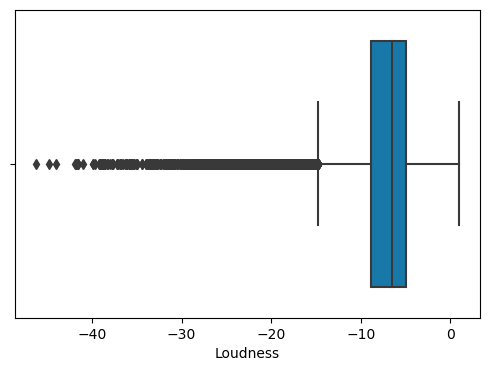

In [25]:
plot.figure(figsize=(6, 4))
sns.boxplot(data, x='Loudness',palette='winter')

<Axes: xlabel='Speechiness'>

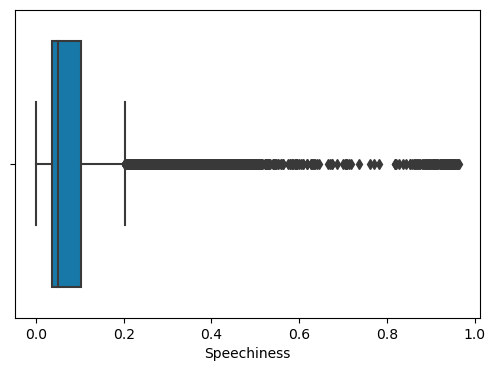

In [26]:
plot.figure(figsize=(6, 4))
sns.boxplot(data, x='Speechiness',palette='winter')

<Axes: xlabel='Instrumentalness'>

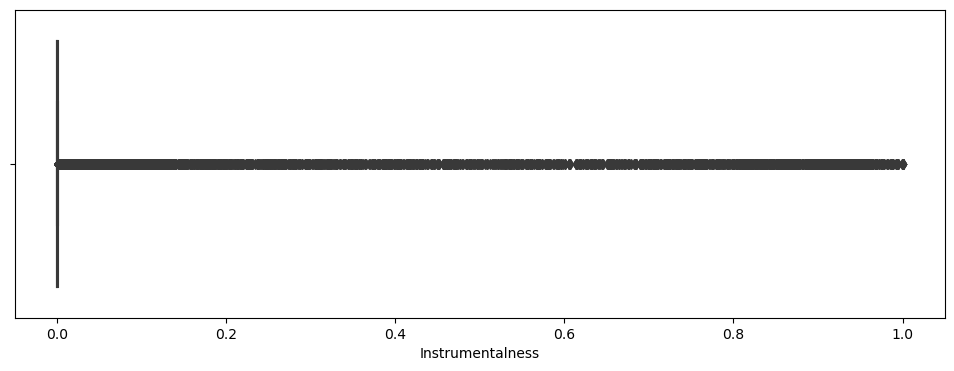

In [27]:
plot.figure(figsize=(12, 4))
sns.boxplot(data, x='Instrumentalness',palette='winter')

<Axes: xlabel='Liveness'>

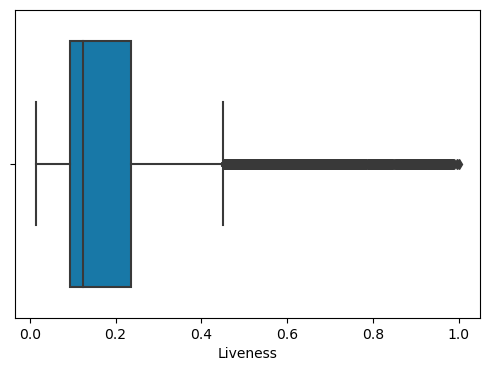

In [28]:
plot.figure(figsize=(6, 4))
sns.boxplot(data, x='Liveness',palette='winter')

<Axes: xlabel='Valence'>

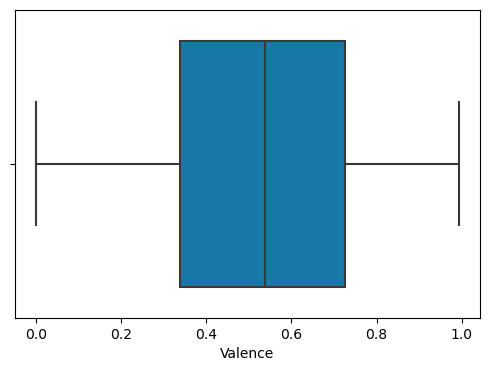

In [29]:
plot.figure(figsize=(6, 4))
sns.boxplot(data, x='Valence',palette='winter')

<Axes: xlabel='Tempo'>

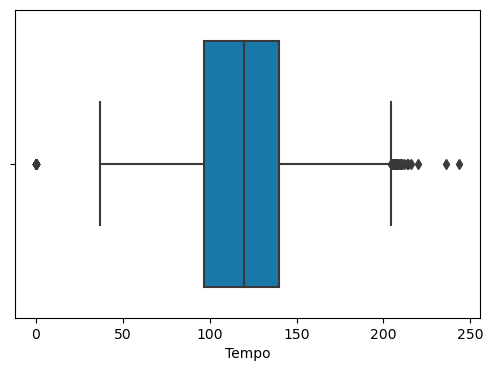

In [30]:
plot.figure(figsize=(6, 4))
sns.boxplot(data, x='Tempo',palette='winter')

<Axes: xlabel='Duration_ms'>

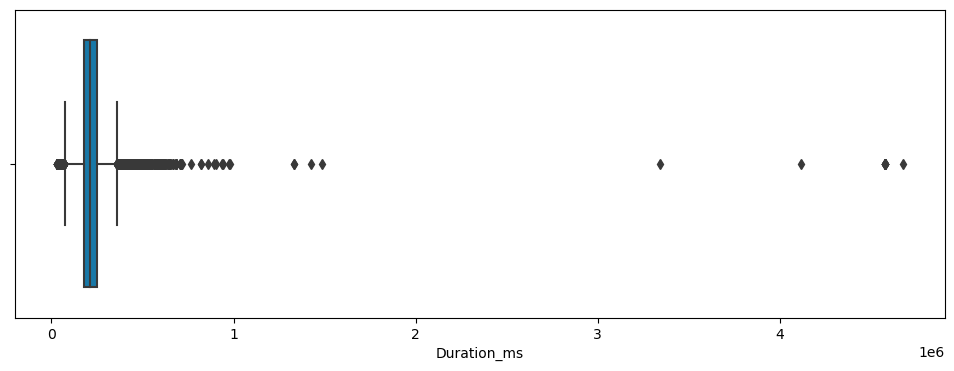

In [31]:
plot.figure(figsize=(12, 4))
sns.boxplot(data, x='Duration_ms',palette='winter')

<Axes: xlabel='Views'>

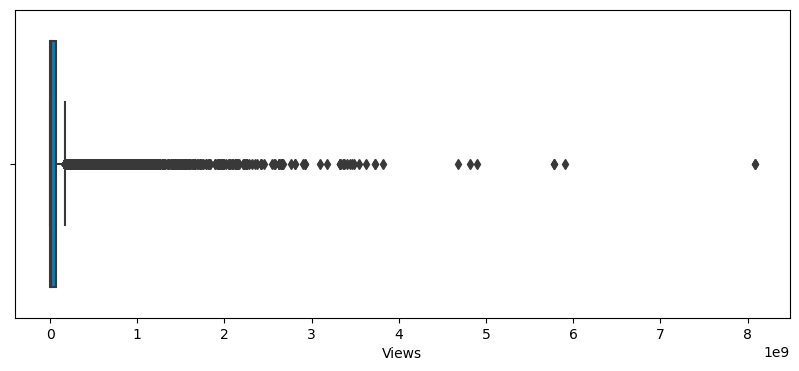

In [32]:
plot.figure(figsize=(10, 4))
sns.boxplot(data, x='Views',palette='winter')

<Axes: xlabel='Likes'>

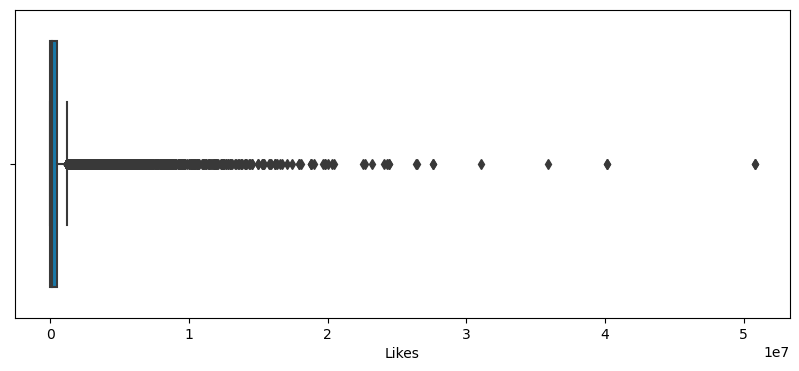

In [33]:
plot.figure(figsize=(10, 4))
sns.boxplot(data, x='Likes',palette='winter')

<Axes: xlabel='Comments'>

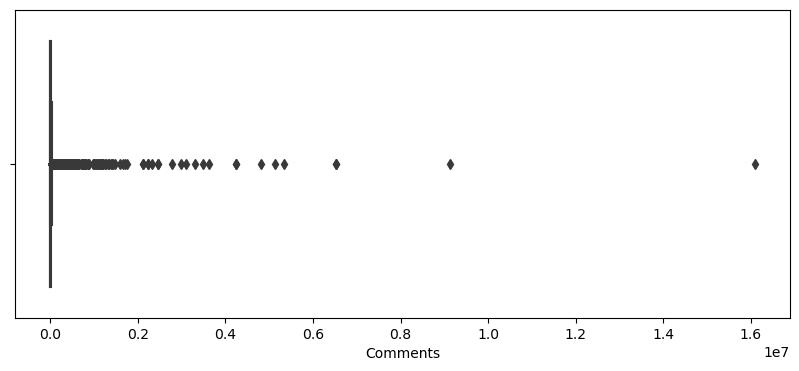

In [34]:
plot.figure(figsize=(10, 4))
sns.boxplot(data, x='Comments',palette='winter')

<Axes: xlabel='Stream'>

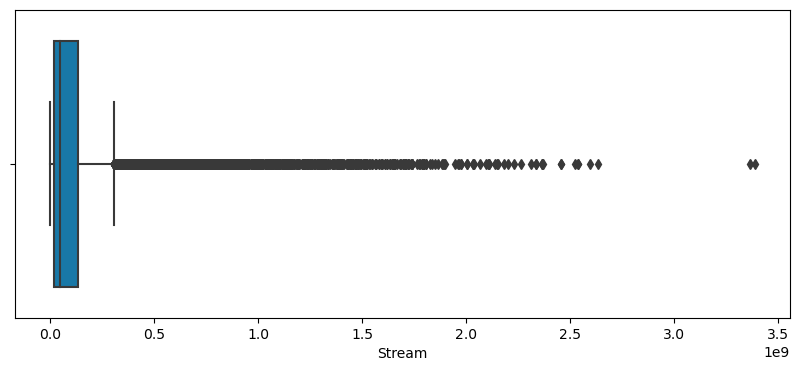

In [35]:
plot.figure(figsize=(10, 4))
sns.boxplot(data, x='Stream',palette='winter')

In [36]:
box=data.select_dtypes(include=['float','int'])

In [37]:
box.columns

Index(['Unnamed: 0', 'Danceability', 'Energy', 'Key', 'Loudness',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments',
       'Stream'],
      dtype='object')

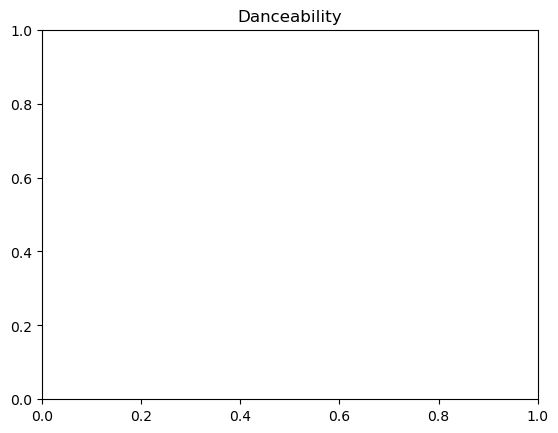

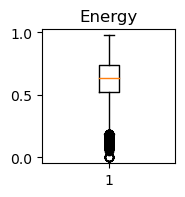

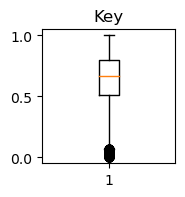

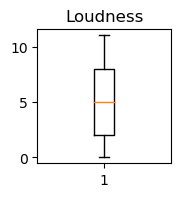

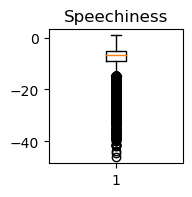

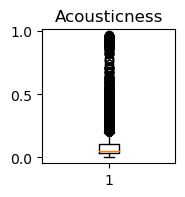

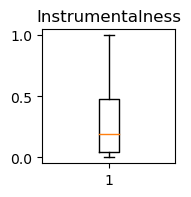

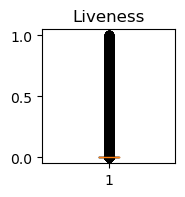

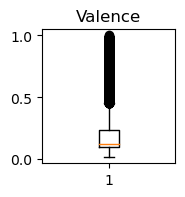

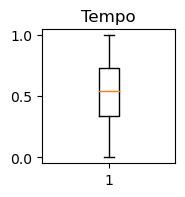

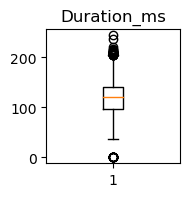

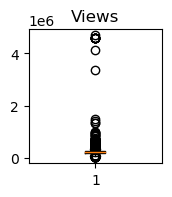

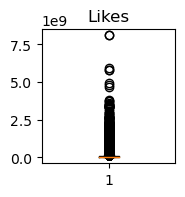

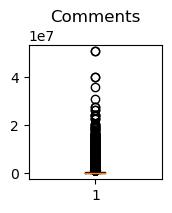

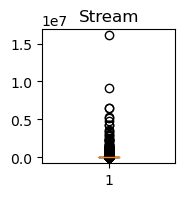

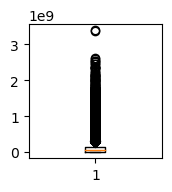

In [38]:
j=1
for i in ['Danceability', 'Energy', 'Key', 'Loudness',
       'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Duration_ms', 'Views', 'Likes', 'Comments',
       'Stream']:
    plot.title(i)
    plot.figure(figsize=(10,8))
    plot.subplot(4,5,j)
    plot.boxplot(box[i])
    j=j+1
plot.show()

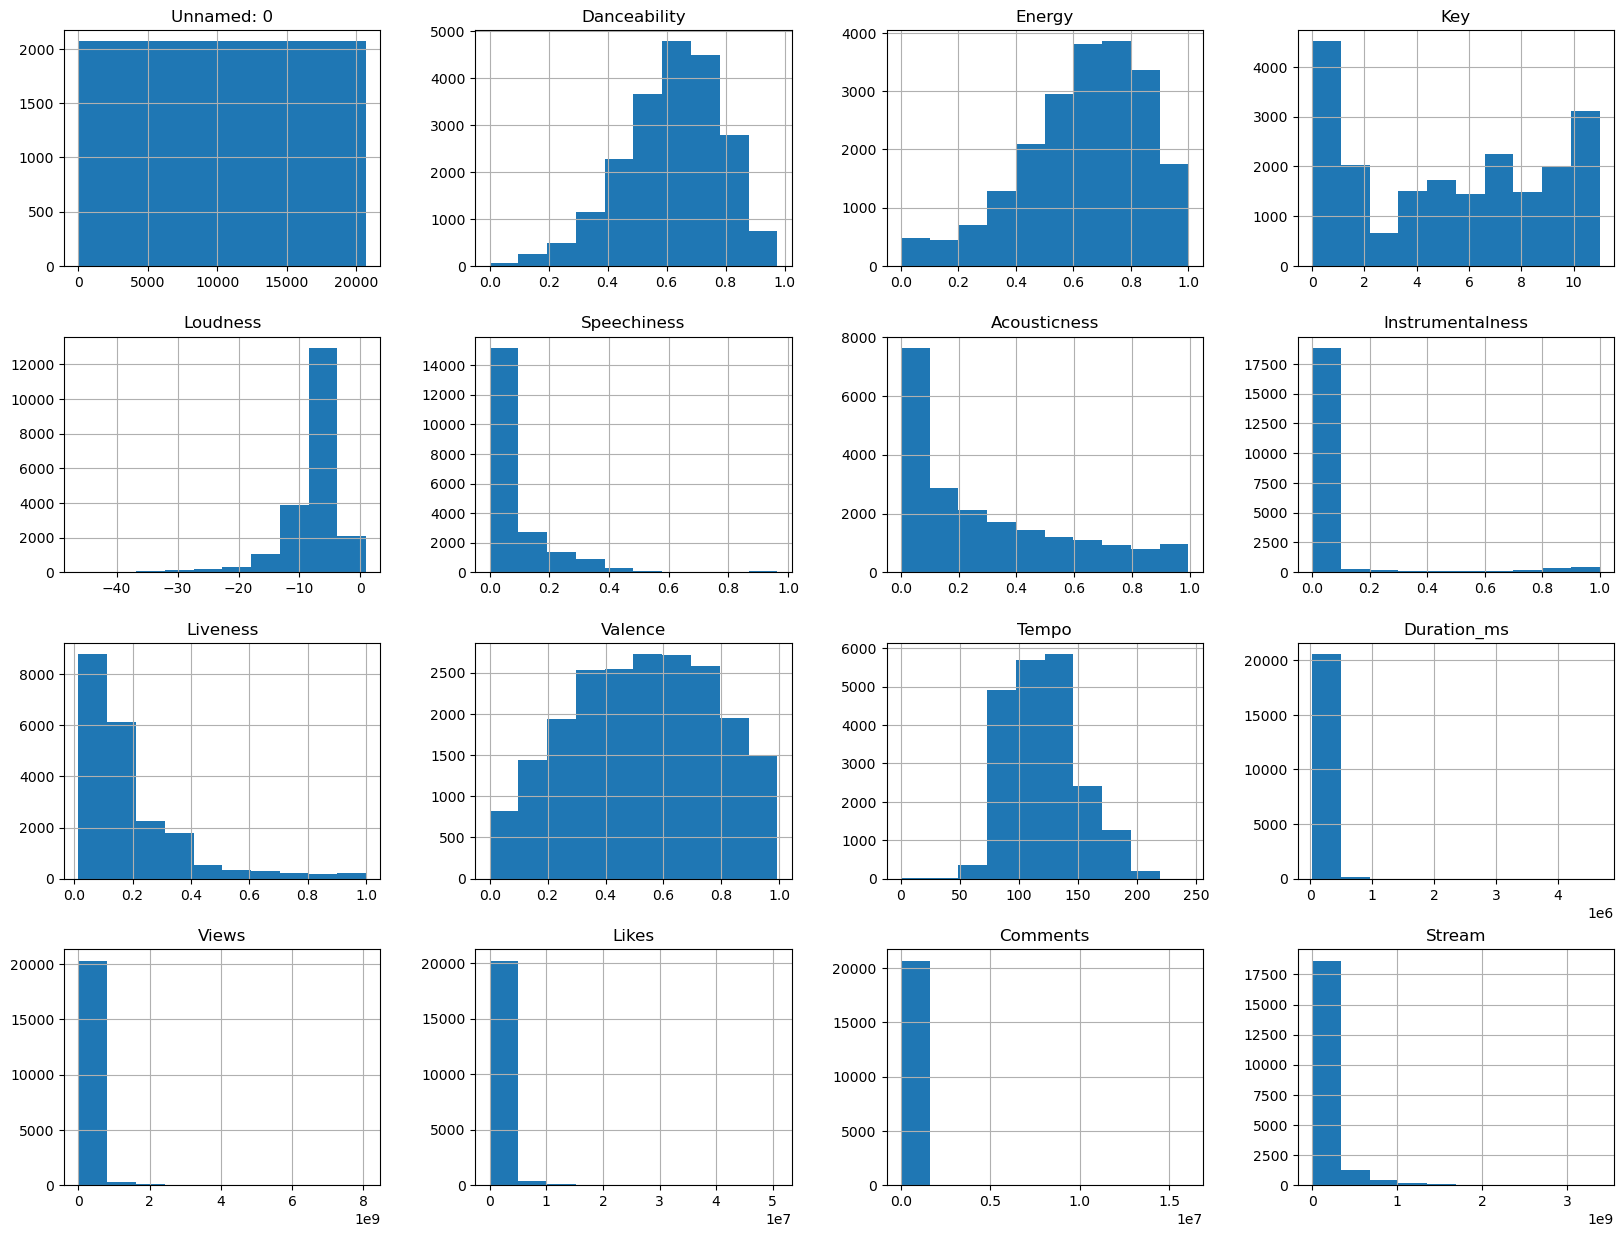

In [39]:
data.hist(figsize=(20,15))
plot.show()

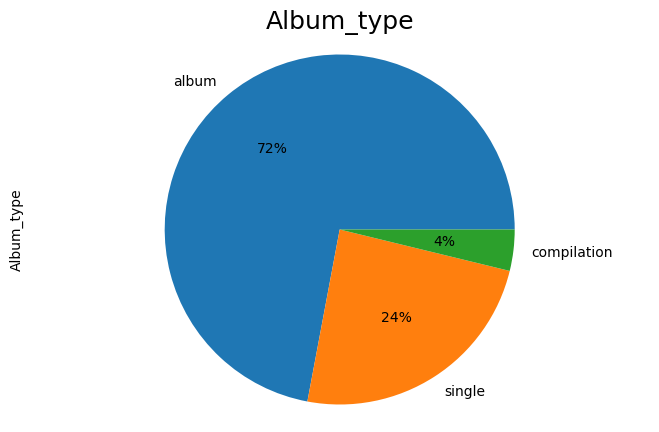

In [40]:
# Visualize the distribution of Album_type
plot.figure(figsize=(8,5))
data.Album_type.value_counts().plot(kind='pie', autopct='%1.0f%%')
plot.axis('equal')
plot.title("Album_type", fontsize='18')
plot.show()

C:\Users\ppbin\AppData\Local\Temp\ipykernel_3884\3456596411.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_view_album = data.groupby('Album_type').sum().sort_values('Views',ascending=False).reset_index()


Text(0.5, 0.98, 'Total album types')

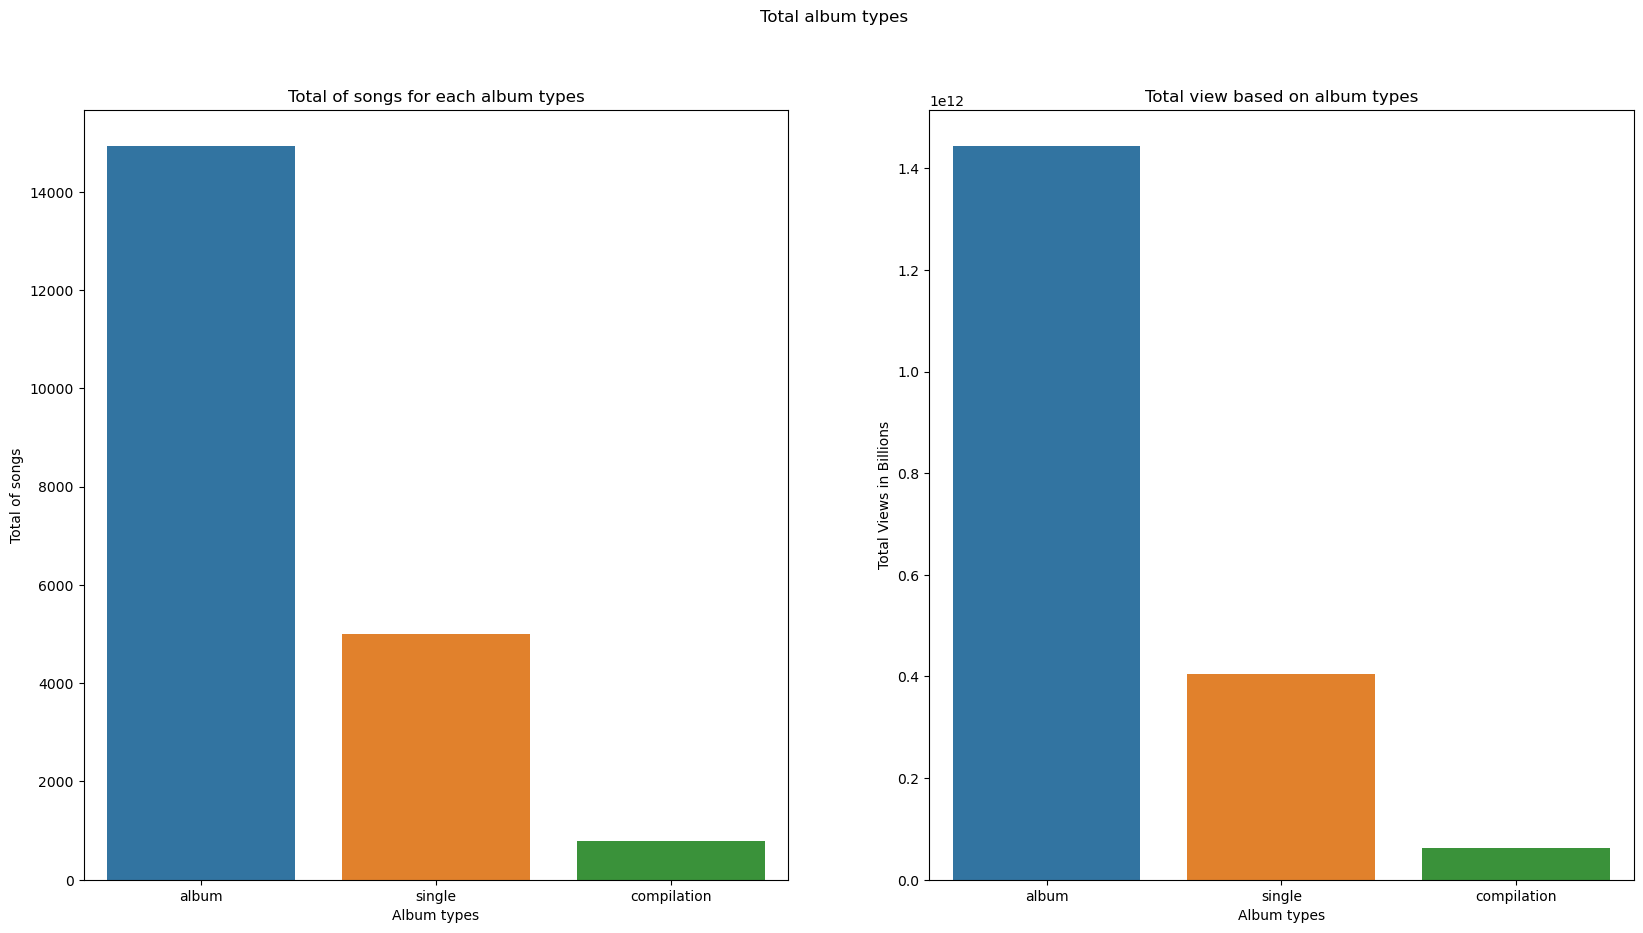

In [41]:
def formatter(x, pos):
    return str(round(x / 1e9, 1))
def millformatter(x, pos):
    return str(round(x / 1e6, 1)) 

fig, (ax1,ax2) = plot.subplots(nrows=1,ncols=2,sharex=True,figsize=(20,10))

sns.countplot(data,x='Album_type',ax=ax1)
ax1.set_title("Total of songs for each album types")
ax1.set_ylabel("Total of songs")
ax1.set_xlabel("Album types")


most_view_album = data.groupby('Album_type').sum().sort_values('Views',ascending=False).reset_index()
sns.barplot(most_view_album,y='Views',x='Album_type',ax=ax2)

ax2.set_title("Total view based on album types")
ax2.set_ylabel("Total Views in Billions")
ax2.set_xlabel("Album types")
#ax2.yaxis.set_major_formatter(formatter)
#ax2.yaxis.set_minor_formatter(NullFormatter())

fig.suptitle("Total album types")

C:\Users\ppbin\AppData\Local\Temp\ipykernel_3884\1477675273.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_view_track = data.groupby('Track').sum().sort_values('Views',ascending=False).reset_index().head(10)
C:\Users\ppbin\AppData\Local\Temp\ipykernel_3884\1477675273.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_likes_track = data.groupby('Track').sum().sort_values('Likes',ascending=False).reset_index().head(10)
C:\Users\ppbin\AppData\Local\Temp\ipykernel_3884\1477675273.py:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, nu

Text(0.5, 0.98, 'Top 10 of track')

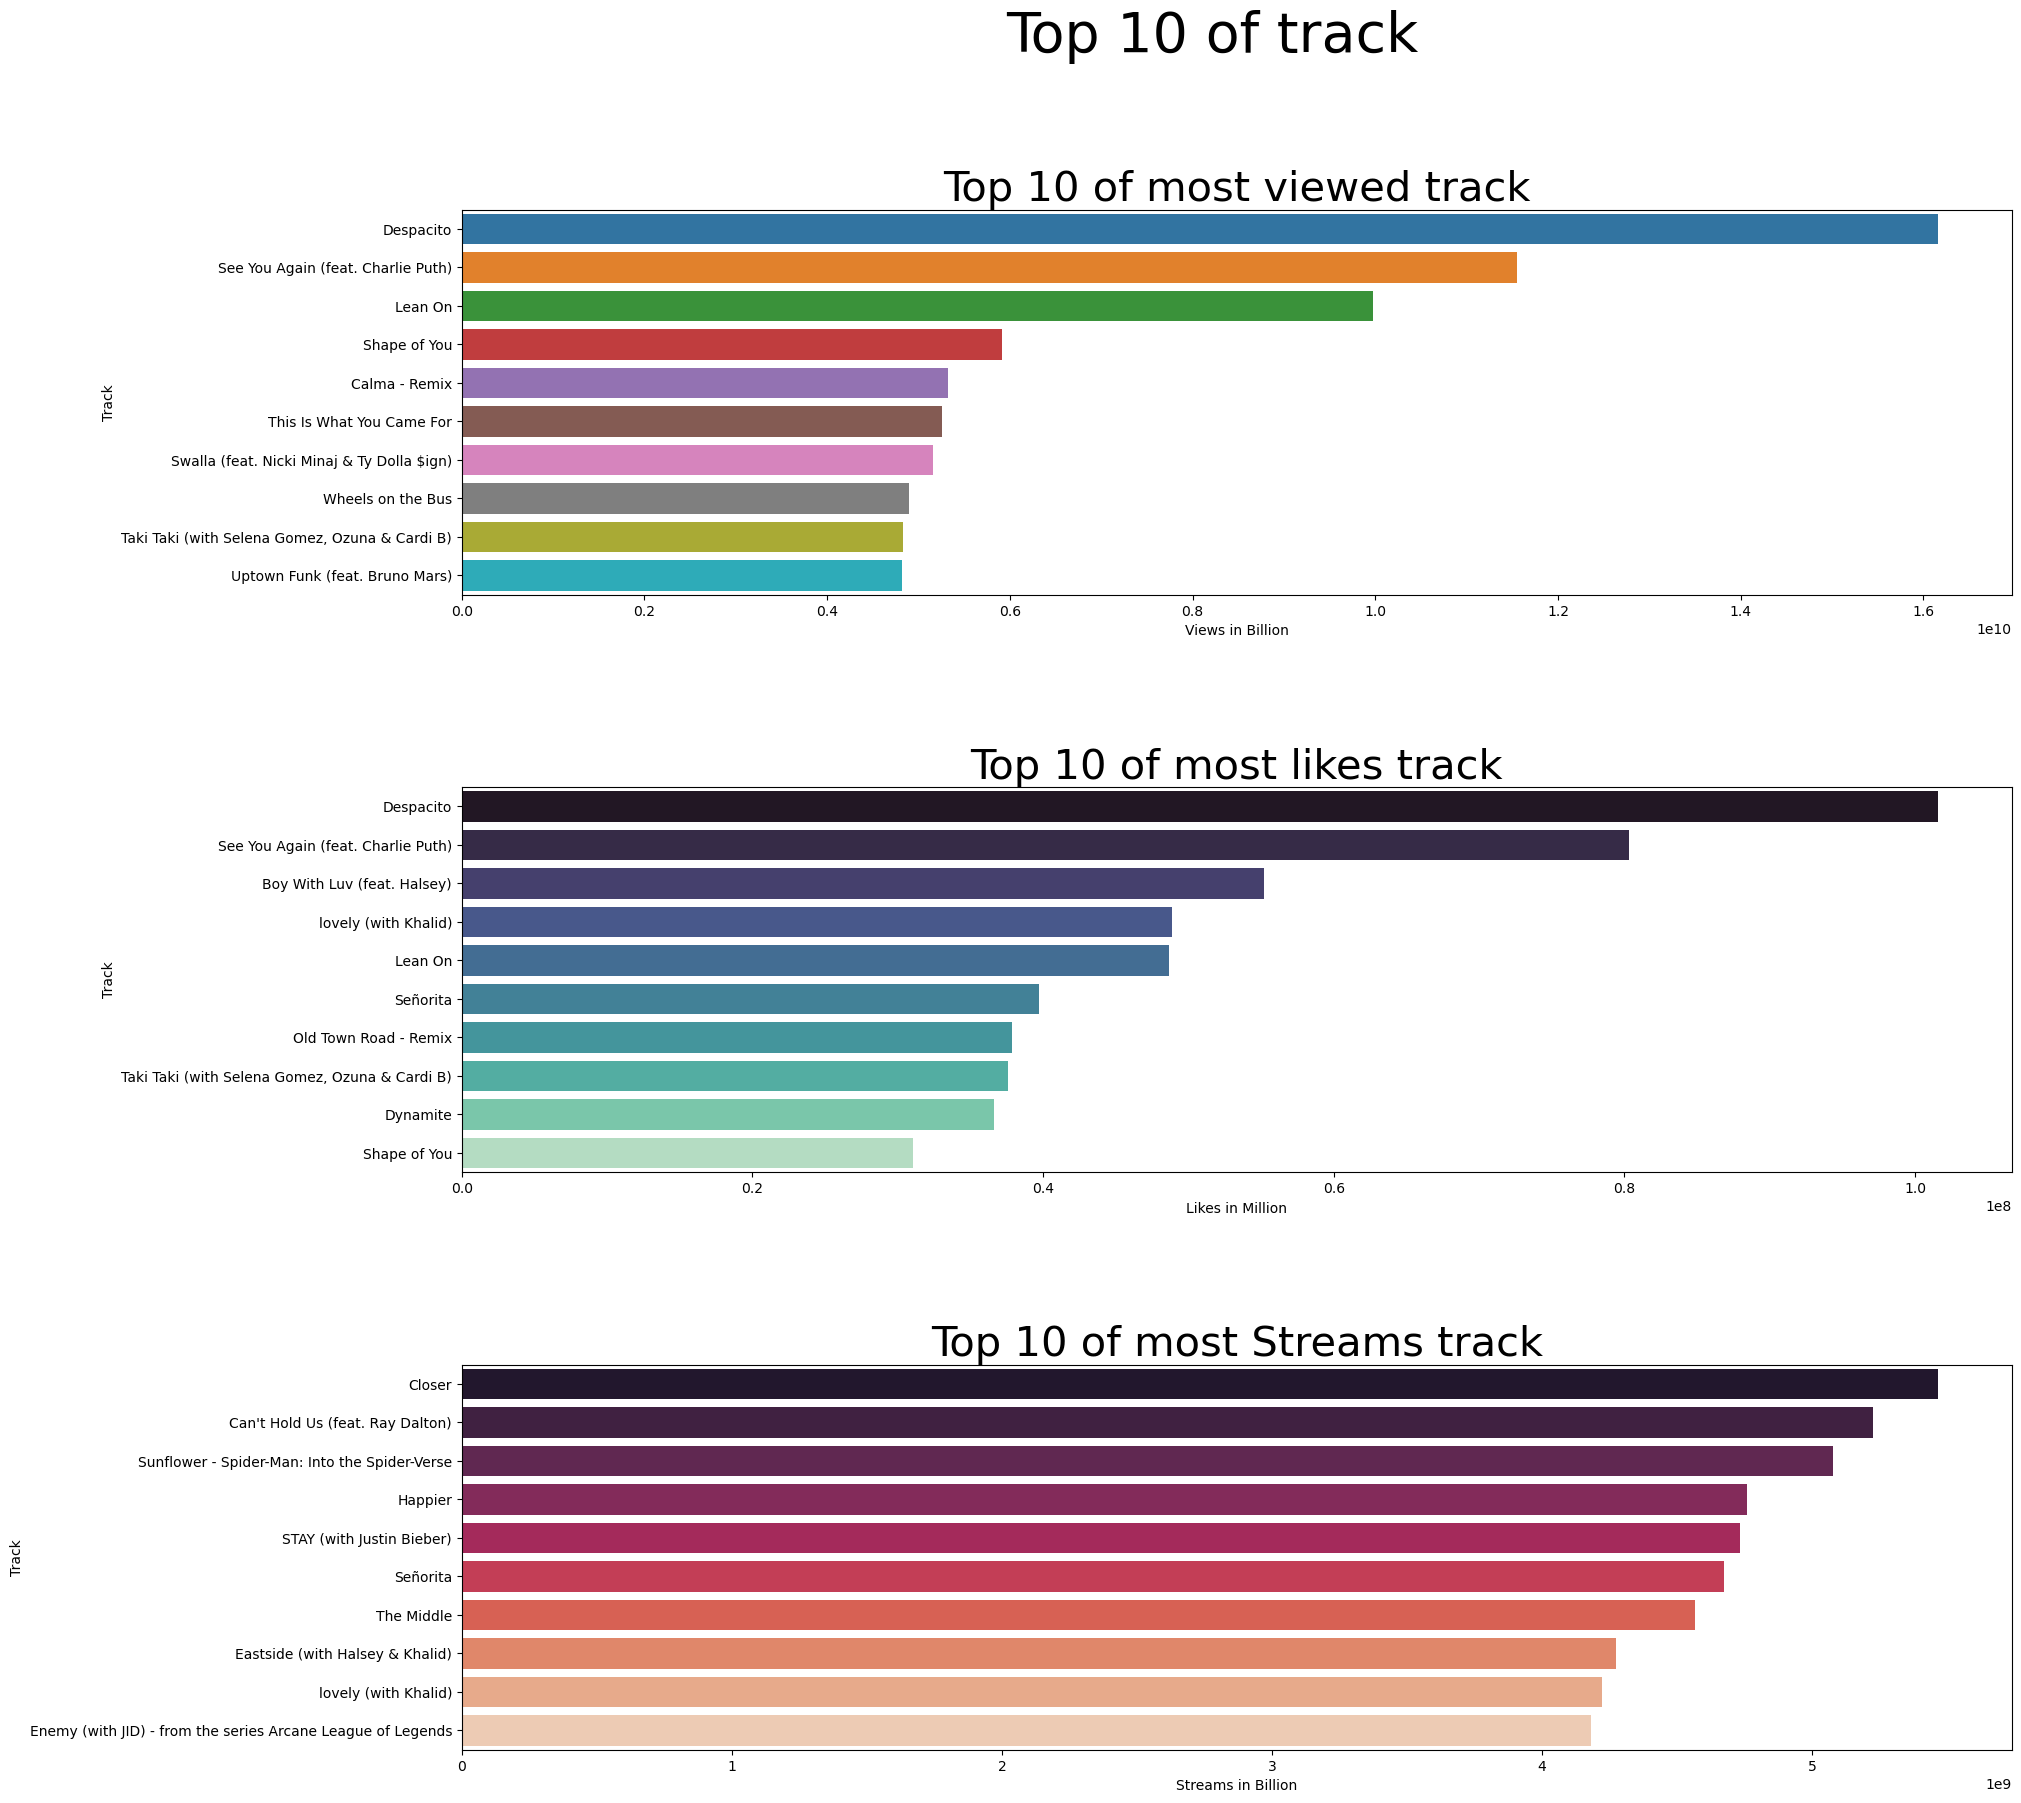

In [42]:
# Which track have the most view and likes on Youtube and stream on Spotify
fig, (ax1,ax2,ax3) = plot.subplots(nrows=3,ncols=1,figsize= (20,20))
fig.subplots_adjust(hspace=0.5)
most_view_track = data.groupby('Track').sum().sort_values('Views',ascending=False).reset_index().head(10)
sns.barplot(most_view_track,x='Views',y='Track',ax=ax1)

ax1.set_title("Top 10 of most viewed track",fontsize=30)
ax1.set_xlabel("Views in Billion")


most_likes_track = data.groupby('Track').sum().sort_values('Likes',ascending=False).reset_index().head(10)
sns.barplot(most_likes_track,x='Likes',y='Track',palette='mako',ax=ax2)

ax2.set_title("Top 10 of most likes track",fontsize=30)
ax2.set_xlabel("Likes in Million")


most_stream_track = data.groupby('Track').sum().sort_values('Stream',ascending=False).reset_index().head(10)
sns.barplot(most_stream_track,x='Stream',y='Track',palette='rocket',ax=ax3)

ax3.set_title("Top 10 of most Streams track",fontsize=30)
ax3.set_xlabel("Streams in Billion")


fig.suptitle("Top 10 of track",fontsize=40)

C:\Users\ppbin\AppData\Local\Temp\ipykernel_3884\4228323590.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_popular_artist = data.groupby('Artist').sum()
C:\Users\ppbin\AppData\Local\Temp\ipykernel_3884\4228323590.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  most_popular_artist_youtube = data.groupby('Artist').sum().sort_values('Views',ascending=False).reset_index().head(10)
C:\Users\ppbin\AppData\Local\Temp\ipykernel_3884\4228323590.py:23: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either sp

Text(0.5, 0.98, 'Artist with the most stream and views')

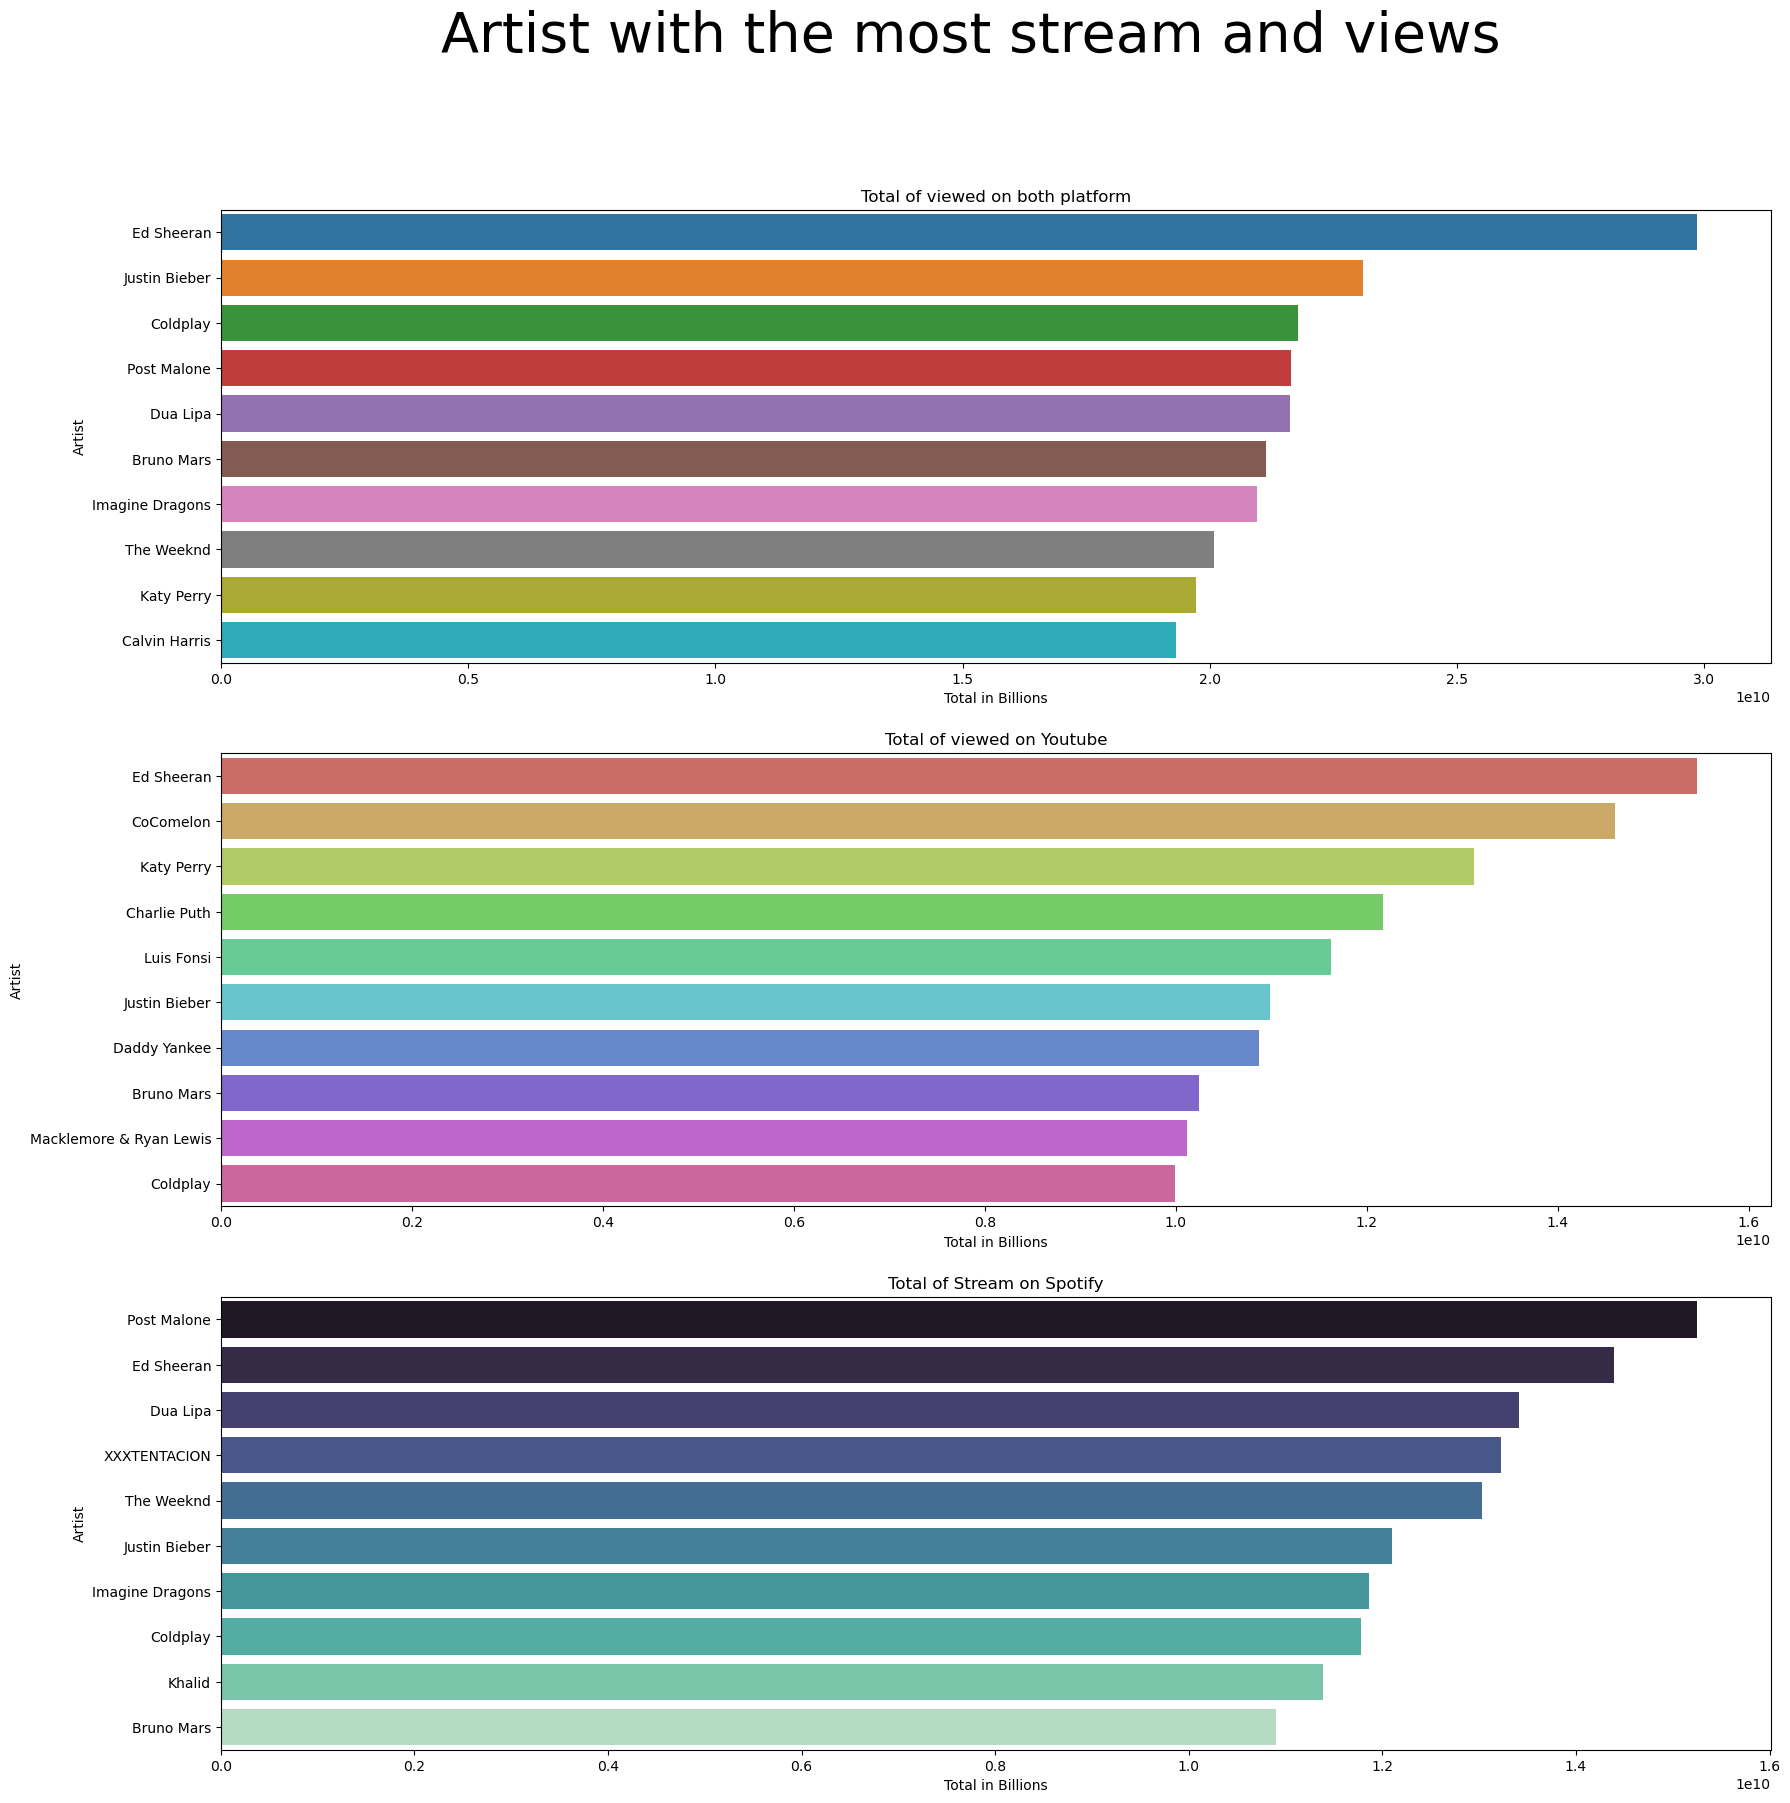

In [48]:
# Artist with the most stream and viewed
fig, (ax1,ax2,ax3) = plot.subplots(nrows=3,ncols=1,figsize=(20,20))
most_popular_artist = data.groupby('Artist').sum()
most_popular_artist['TotalListened'] = most_popular_artist['Views'] +most_popular_artist['Stream']
most_popular_artist = most_popular_artist.sort_values('TotalListened',ascending=False).reset_index().head(10)

sns.barplot(most_popular_artist,y='Artist',x='TotalListened',ax=ax1)

ax1.set_xlabel("Total in Billions")
ax1.set_title("Total of viewed on both platform")

# Youtube

most_popular_artist_youtube = data.groupby('Artist').sum().sort_values('Views',ascending=False).reset_index().head(10)

sns.barplot(most_popular_artist_youtube,y='Artist',x='Views',palette='hls',ax=ax2)

ax2.set_xlabel("Total in Billions")
ax2.set_title("Total of viewed on Youtube")

# Spotify

most_popular_artist_spotify = data.groupby('Artist').sum().sort_values('Stream',ascending=False).reset_index().head(10)

sns.barplot(most_popular_artist_spotify,y='Artist',x='Stream',palette='mako',ax=ax3)

ax3.set_xlabel("Total in Billions")
ax3.set_title("Total of Stream on Spotify")

fig.suptitle("Artist with the most stream and views",fontsize=40)

C:\Users\ppbin\AppData\Local\Temp\ipykernel_3884\2374433346.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ed_sheeran = data.groupby(['Artist','Track']).sum().reset_index()


Text(0.5, 1.0, 'Most popular track by Ed Sheeran')

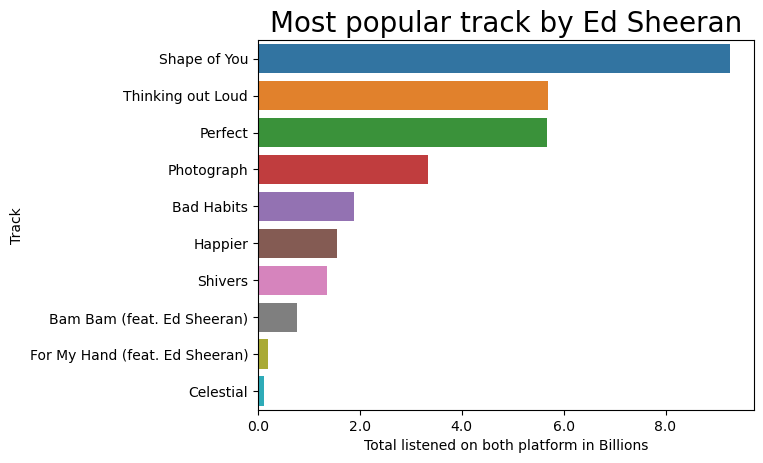

In [49]:
#most track that popular by Ed Sheeran
ed_sheeran = data.groupby(['Artist','Track']).sum().reset_index()
ed_sheeran = ed_sheeran[ed_sheeran['Artist'] == 'Ed Sheeran']
ed_sheeran['TotalListened'] = ed_sheeran.Views  + ed_sheeran.Stream
ed_sheeran = ed_sheeran.sort_values('TotalListened',ascending=False)

fig = sns.barplot(ed_sheeran,x='TotalListened',y='Track')
fig.xaxis.set_major_formatter(formatter)
fig.set_xlabel("Total listened on both platform in Billions")
fig.set_title("Most popular track by Ed Sheeran",fontsize=20)

C:\Users\ppbin\AppData\Local\Temp\ipykernel_3884\3245324823.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Coldplay = data.groupby(['Artist','Track']).sum().reset_index()


Text(0.5, 1.0, 'Most popular track by Coldplay')

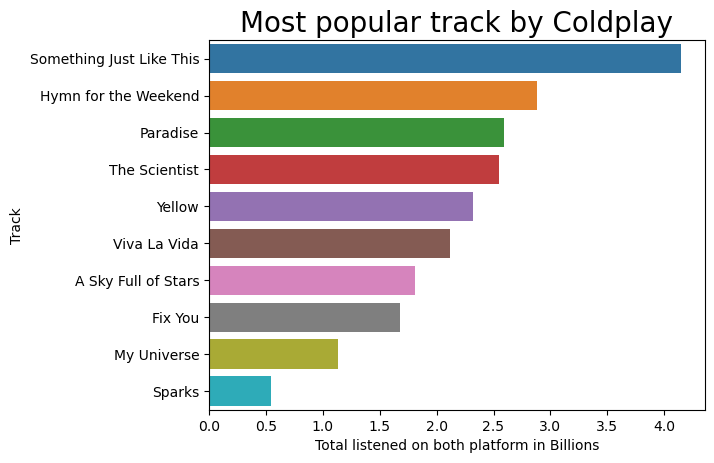

In [50]:
#most track that popular by Coldplay
Coldplay = data.groupby(['Artist','Track']).sum().reset_index()
Coldplay = Coldplay[Coldplay['Artist'] == 'Coldplay']
Coldplay['TotalListened'] = Coldplay.Views  + Coldplay.Stream
Coldplay = Coldplay.sort_values('TotalListened',ascending=False)

fig = sns.barplot(Coldplay,x='TotalListened',y='Track')
fig.xaxis.set_major_formatter(formatter)
fig.set_xlabel("Total listened on both platform in Billions")
fig.set_title("Most popular track by Coldplay",fontsize=20)

C:\Users\ppbin\AppData\Local\Temp\ipykernel_3884\1059837152.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  CoComelon = data.groupby(['Artist','Track']).sum().reset_index()
C:\Users\ppbin\AppData\Local\Temp\ipykernel_3884\1059837152.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  CoComelon = Coldplay[CoComelon['Artist'] == 'CoComelon']


Text(0.5, 1.0, 'Most popular track by CoComelon')

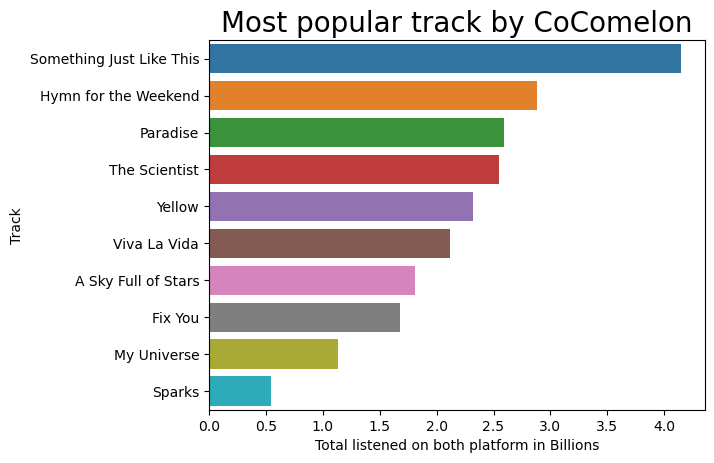

In [51]:
#most track that popular by CoComelon
CoComelon = data.groupby(['Artist','Track']).sum().reset_index()
CoComelon = Coldplay[CoComelon['Artist'] == 'CoComelon']
CoComelon['TotalListened'] = CoComelon.Views  + CoComelon.Stream
CoComelon = CoComelon.sort_values('TotalListened',ascending=False)

fig = sns.barplot(Coldplay,x='TotalListened',y='Track')
fig.xaxis.set_major_formatter(formatter)
fig.set_xlabel("Total listened on both platform in Billions")
fig.set_title("Most popular track by CoComelon",fontsize=20)

C:\Users\ppbin\AppData\Local\Temp\ipykernel_3884\3156272343.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  danceability_track = data.groupby(['Track','Danceability']).sum().reset_index()


NameError: name 'Text' is not defined

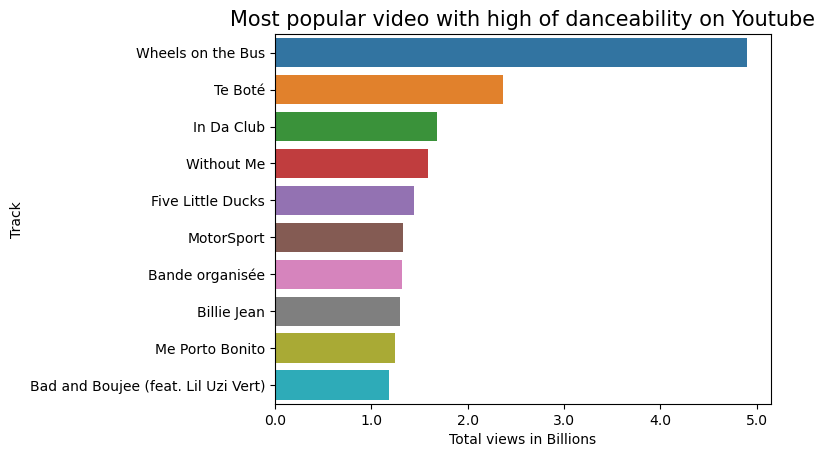

In [52]:
# most popular video with high of Danceability on Youtube
danceability_track = data.groupby(['Track','Danceability']).sum().reset_index()
danceability_track = danceability_track[danceability_track['Danceability'] > 0.9]\
.sort_values('Views',ascending=False).head(10)

fig = sns.barplot(danceability_track,y='Track',x='Views')
fig.set_title("Most popular video with high of danceability on Youtube",fontsize=15)
fig.xaxis.set_major_formatter(formatter)
fig.set_xlabel("Total views in Billions")
Text(0.5, 0, 'Total views in Billions')


C:\Users\ppbin\AppData\Local\Temp\ipykernel_3884\3054774499.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  happy_track = data.groupby(['Track','Valence']).sum().sort_values('Stream',ascending=False).reset_index()
C:\Users\ppbin\AppData\Local\Temp\ipykernel_3884\3054774499.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sad_track = data.groupby(['Track','Valence']).sum().sort_values('Stream',ascending=False).reset_index()


Text(0.5, 0.98, 'Most viewed track on happy and sad vibes')

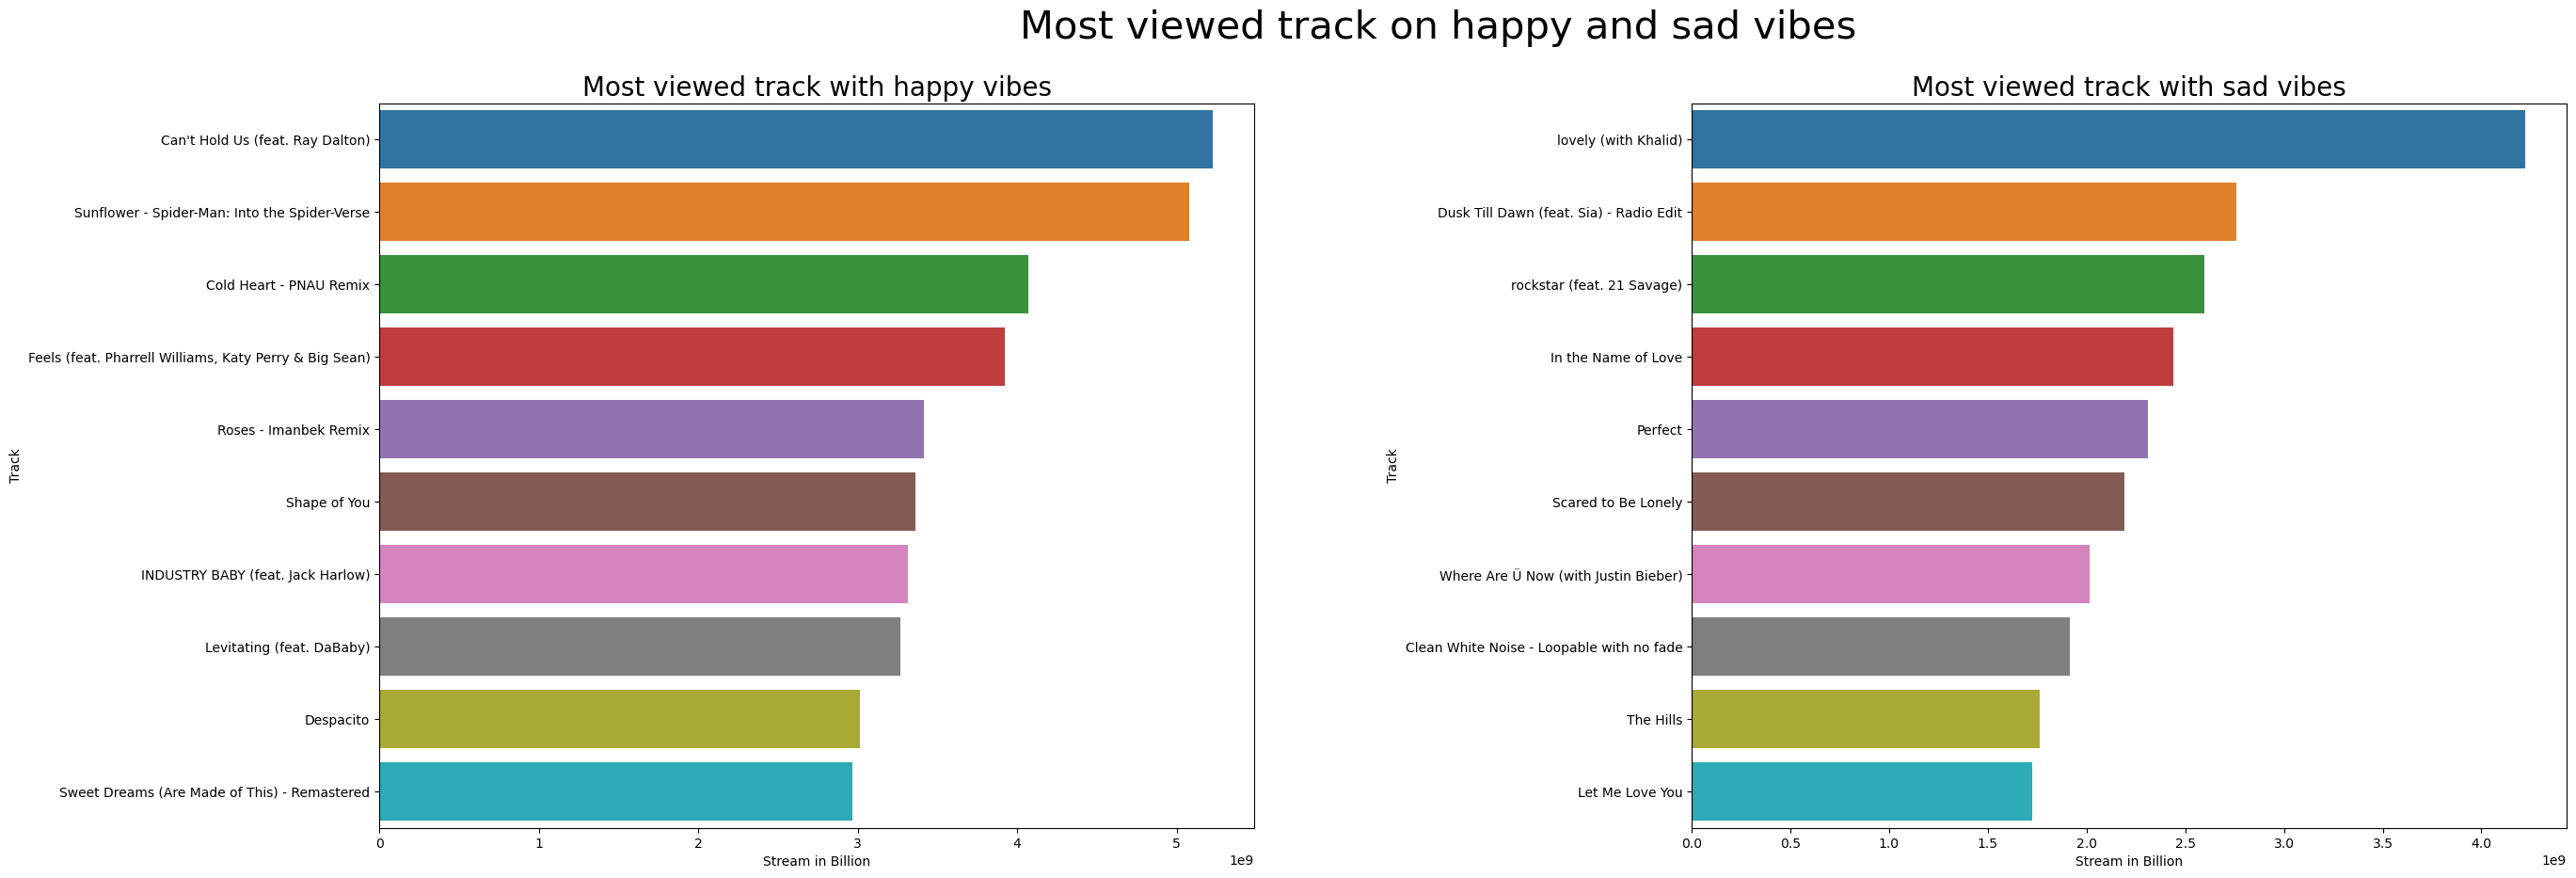

In [53]:
# what the most viewed cheerfull track and sad track on Spotify
fig ,(ax1,ax2) = plot.subplots(nrows=1,ncols=2,figsize=(30,10))
fig.subplots_adjust(wspace=0.5)
# Valence with score above 0.8

happy_track = data.groupby(['Track','Valence']).sum().sort_values('Stream',ascending=False).reset_index()
happy_track = happy_track[happy_track['Valence']>0.8].head(10)

sns.barplot(happy_track,x='Stream',y='Track',ax=ax1)
ax1.set_title("Most viewed track with happy vibes",fontsize=20)
ax1.set_xlabel("Stream in Billion")

# Valecne with score below 0.2

sad_track = data.groupby(['Track','Valence']).sum().sort_values('Stream',ascending=False).reset_index()
sad_track = sad_track[sad_track['Valence']<0.2].head(10)

sns.barplot(sad_track,x='Stream',y='Track',ax=ax2)
ax2.set_title("Most viewed track with sad vibes",fontsize=20)
ax2.set_xlabel("Stream in Billion")

fig.suptitle("Most viewed track on happy and sad vibes",fontsize=30)

Text(0.5, 1.0, 'Relationship between views and likes on youtube videos')

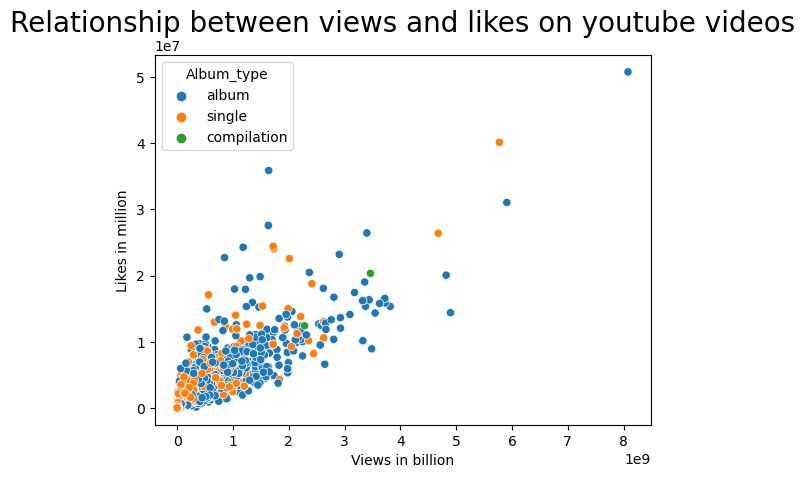

In [54]:
# relationship between variable views and likes on youtube videos
fig = sns.scatterplot(data,x='Views',y='Likes',hue='Album_type')
fig.set_ylabel("Likes in million")


fig.set_xlabel("Views in billion")
fig.set_title("Relationship between views and likes on youtube videos",fontsize=20)

In [55]:
# relationship between variable views on youtube and stream on Spotify
fig = sns.scatterplot(data,x='Viewes',y='Stream',hue='Album_type')
fig.set_ylabel("Stream in billions")

fig.set_xlabel("Views in billions")
fig.set_title("Relationship between views on both platforms",fontsize=20)

ValueError: Could not interpret value `Viewes` for parameter `x`

In [ ]:
# relationship between variable views on youtube and stream on Spotify
fig = sns.scatterplot(data,x='Likes',y='Stream',hue='Album_type')
fig.set_ylabel("Stream in billions")

fig.set_xlabel("Likes in millions")
fig.set_title("Relationship between Likes on both platforms",fontsize=20)

In [ ]:
#  the relationship between duration and views
data_duration = data 
data_duration['Duration_ms'] = (data_duration['Duration_ms']/1000)/60
# Mili second to  minutes
fig = sns.scatterplot(data_duration,y='Duration_ms',x='Views')
fig.set_title("Relationship between duration views",fontsize=15)

[Text(0.5, 1.0, 'Loudness vs Energy correlation')]

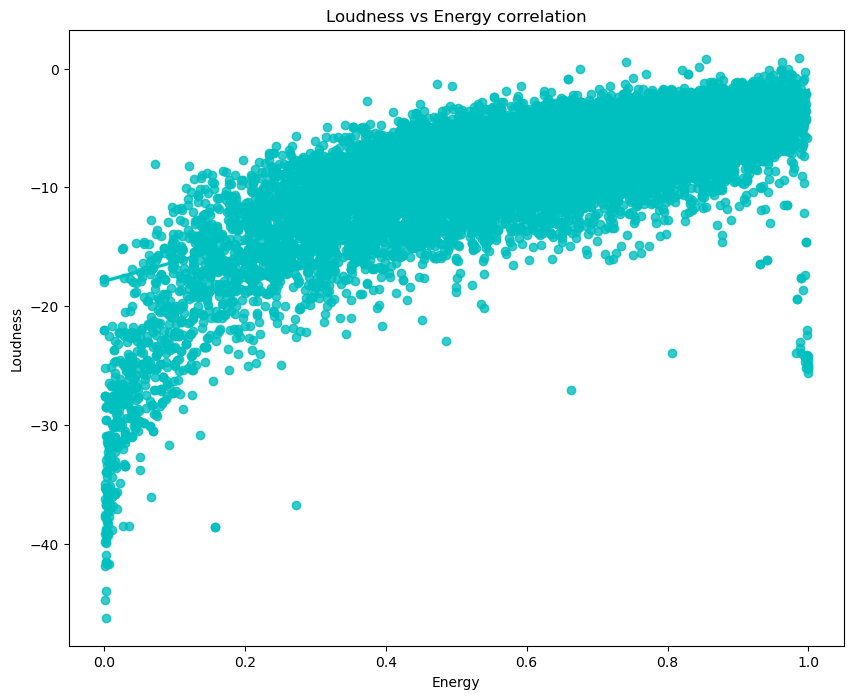

In [56]:
#positive correlation
plot.figure(figsize=(10,8))
sns.regplot(data=data,y="Loudness",x="Energy",color="c").set(title="Loudness vs Energy correlation")

[Text(0.5, 1.0, 'Loudness vs Danceability correlation')]

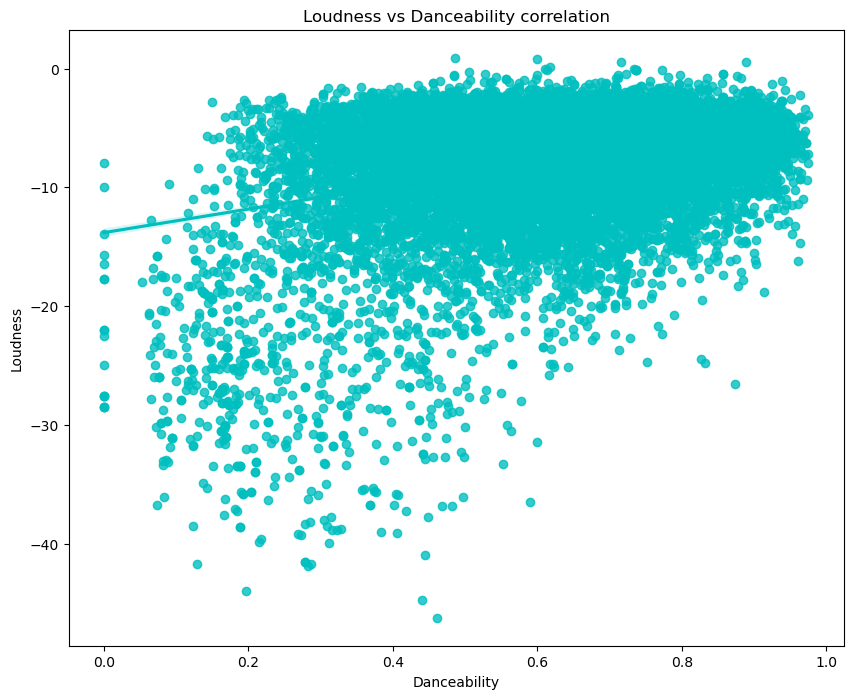

In [57]:
#positive correlation
plot.figure(figsize=(10,8))
sns.regplot(data=data,y="Loudness",x="Danceability",color="c").set(title="Loudness vs Danceability correlation")

[Text(0.5, 1.0, 'Loudness vs Speechiness correlation')]

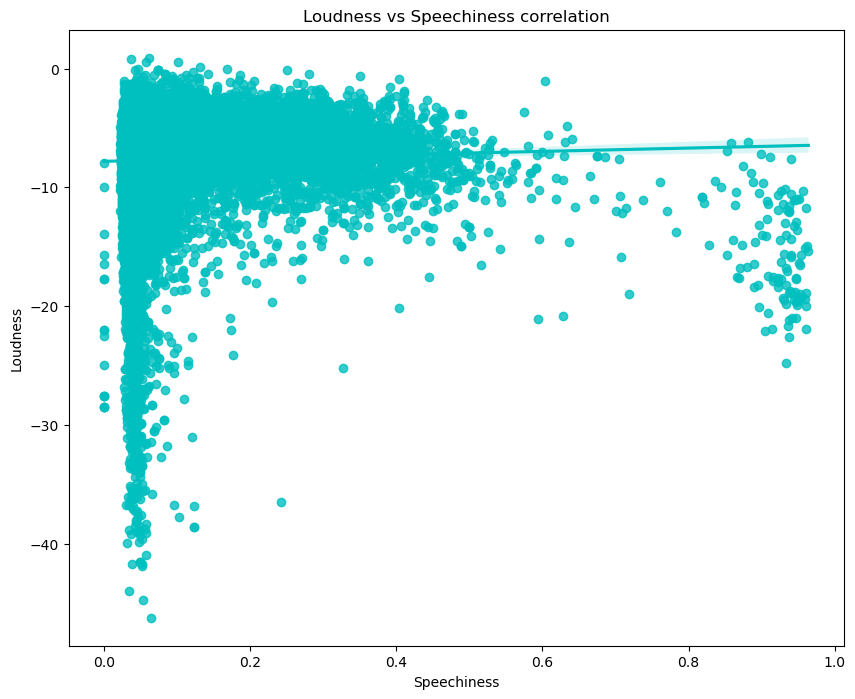

In [58]:
#positive correlation
plot.figure(figsize=(10,8))
sns.regplot(data=data,y="Loudness",x="Speechiness",color="c").set(title="Loudness vs Speechiness correlation")

[Text(0.5, 1.0, 'Loudness vs Valence correlation')]

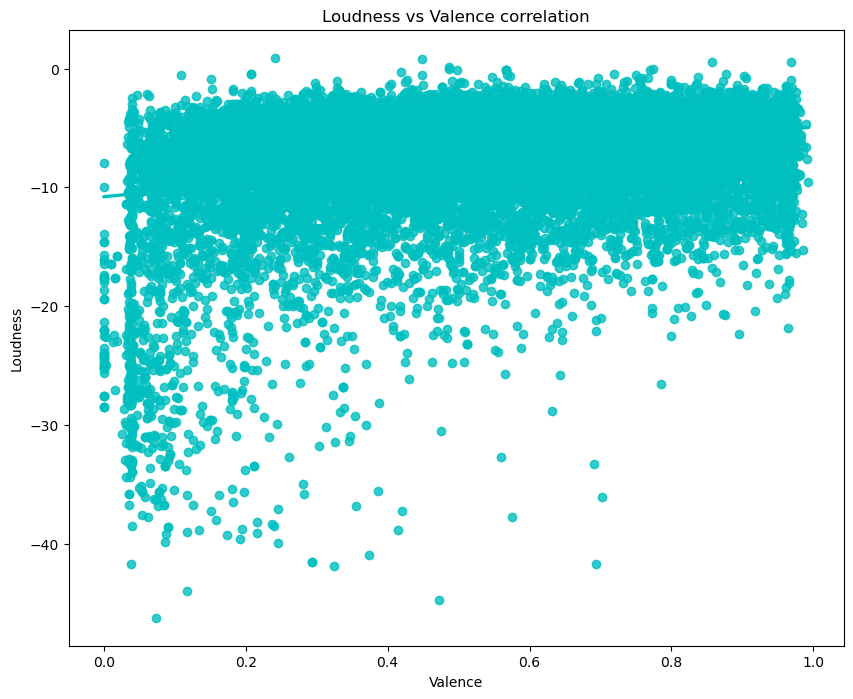

In [59]:
#positive correlation
plot.figure(figsize=(10,8))
sns.regplot(data=data,x="Valence",y="Loudness",color="c").set(title="Loudness vs Valence correlation")

[Text(0.5, 1.0, 'Loudness vs Instrumentalness correlation')]

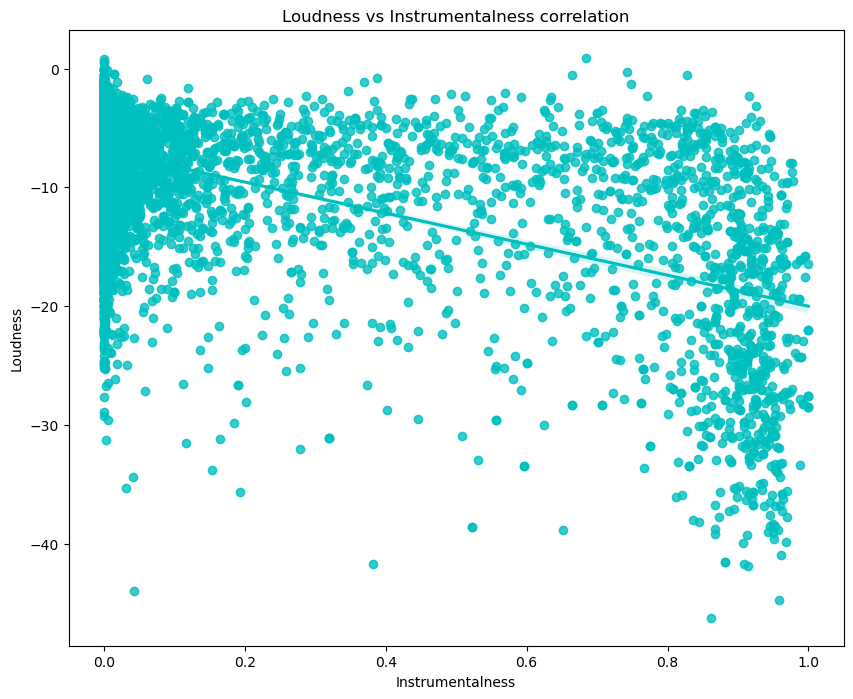

In [60]:
#positive correlation
plot.figure(figsize=(10,8))
sns.regplot(data=data,x="Instrumentalness",y="Loudness",color="c").set(title="Loudness vs Instrumentalness correlation")

[Text(0.5, 1.0, 'Valence vs Instrumentalness correlation')]

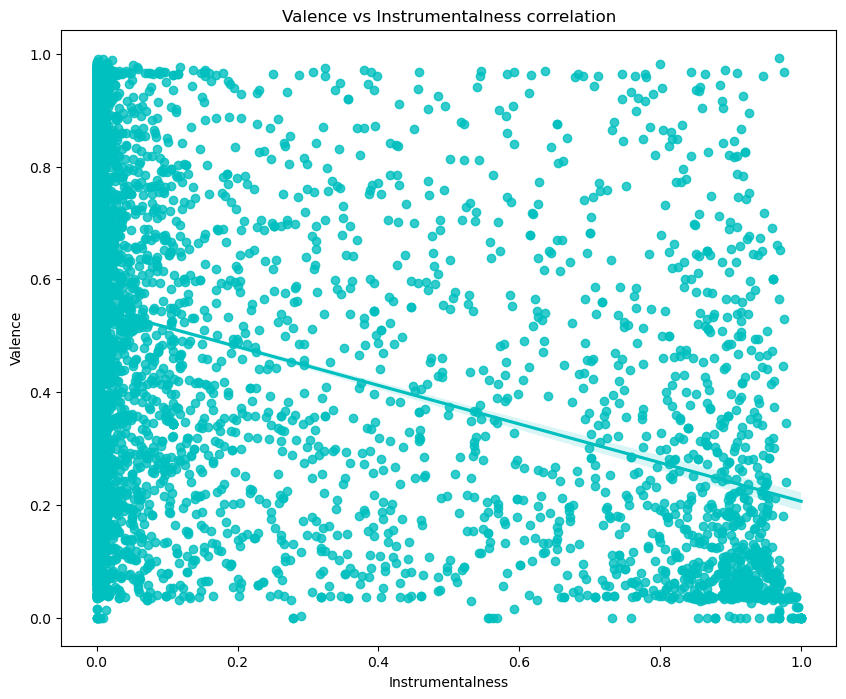

In [61]:
#positive correlation
plot.figure(figsize=(10,8))
sns.regplot(data=data,x="Instrumentalness",y="Valence",color="c").set(title="Valence vs Instrumentalness correlation")

In [62]:
#what features that have good relationship with variable stream,views and likes
features = """Danceability
Energy
Key
Loudness
Speechiness
Acousticness
Instrumentalness
Liveness
Valence
Tempo
Duration_ms
Stream
Views
Likes"""
features = features.split('\n')
features

['Danceability',
 'Energy',
 'Key',
 'Loudness',
 'Speechiness',
 'Acousticness',
 'Instrumentalness',
 'Liveness',
 'Valence',
 'Tempo',
 'Duration_ms',
 'Stream',
 'Views',
 'Likes']

<Axes: >

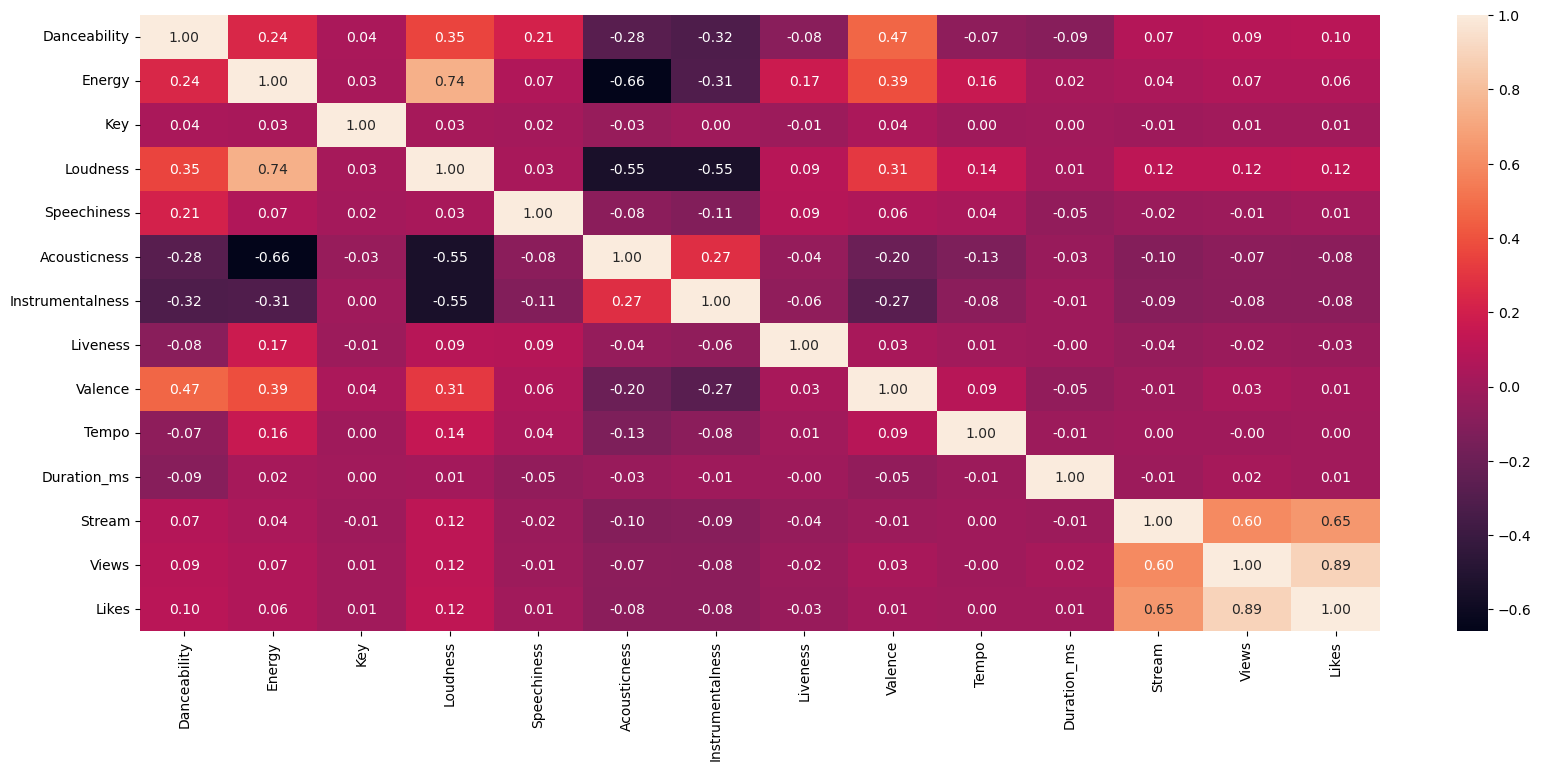

In [63]:
data_feat = data[features]
corr_data = data_feat.corr()
fig = plot.figure(figsize=(20,8))
sns.heatmap(corr_data,annot=True,fmt='.2f')

In [64]:
abs(corr_data['Views']).sort_values(ascending=False)[3:]

Loudness            0.117769
Danceability        0.088183
Instrumentalness    0.077353
Acousticness        0.072687
Energy              0.066270
Valence             0.034378
Duration_ms         0.021924
Liveness            0.018569
Speechiness         0.013851
Key                 0.007929
Tempo               0.000317
Name: Views, dtype: float64

In [65]:
abs(corr_data['Likes']).sort_values(ascending=False)[3:]

Loudness            0.123347
Danceability        0.098871
Acousticness        0.080094
Instrumentalness    0.077339
Energy              0.061680
Liveness            0.025419
Valence             0.010755
Key                 0.006929
Speechiness         0.006539
Duration_ms         0.005900
Tempo               0.003389
Name: Likes, dtype: float64

In [66]:
# Data preprocessing

In [70]:
#now drop and create dummies
data2= data.drop(['Artist', 'Url_spotify', 'Track', 'Album', 'Uri'], axis=1)

In [71]:
data2= pd.get_dummies(data2)

In [72]:
#after encoded data 
y = data2['Views']
X = data2.drop('Views',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
model = lr.fit(X_train, y_train)
predictions = model.predict(X_test)

#R square should be close to 1, mse should be minimum
from sklearn.metrics import mean_squared_error, r2_score
print('MSE is: ', mean_squared_error(y_test, predictions))
print('R squared value is: ', r2_score(y_test, predictions))

MemoryError: Unable to allocate 7.46 GiB for an array with shape (60429, 16574) and data type float64

# Model to predict views


In [ ]:
sort_data=data.sort_values("Views",ascending=True)
sort_data.head()

In [ ]:
#what features that have good relationship with variable stream,views and likes
features = """Danceability
Energy
Key
Loudness
Speechiness
Acousticness
Instrumentalness
Liveness
Valence
Tempo
Duration_ms
Stream
Views
Likes"""
features = features.split('\n')
features

In [ ]:
data_feat = data[features]
corr_data = data_feat.corr()
fig = plot.figure(figsize=(20,8))
sns.heatmap(corr_data,annot=True,fmt='.2f')

In [ ]:
abs(corr_data['Views']).sort_values(ascending=False)[3:]

In [ ]:
abs(corr_data['Likes']).sort_values(ascending=False)[3:]

In [ ]:
#one hot encoding on columns
data =pd.get_dummies(data)

In [ ]:
from sklearn import preprocessing
X = data_feat.drop(columns=['Views','Stream','Likes'],axis=1)
y = data_feat['Views']
std_scaler = preprocessing.StandardScaler()

X_std = std_scaler.fit_transform(X)
# y_std = std_scaler.fit_transform(y)



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [ ]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.25, 
                                                  random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr= LogisticRegression()

In [ ]:
model= lr.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
#evaluation matrices which we use for classification problem
#confusion matrix
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
#kNN model!
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
metric_k = []
neighbors = np.arange(3, 15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    metric_k.append(acc)

plt.plot(neighbors,metric_k, 'o-')
plt.title('kNN Accuracy plot')
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
X = data_feat.drop(columns=['Views','Stream','Likes'],axis=1)
y = data_feat['Views']
X_train=data_feat.drop('Views','Stream','Likes', axis=1)
y_train=data_feat['Views]
X_test=test 

In [ ]:
#modelling
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred= rf.predict(X_test)